In [1]:
# Lousin Babayan
# CA03

# 1 Data Source and Contents

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

In [4]:
print(df.head())

  hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0  


In [5]:
print(df.shape)

(48842, 11)


In [6]:
print(df.describe())

                  y
count  48842.000000
mean       0.239282
std        0.426649
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


In [7]:
pd.options.display.max_columns = 100
pd.set_option('display.max_rows',None)
print(df.dtypes)

hours_per_week_bin    object
occupation_bin        object
msr_bin               object
capital_gl_bin        object
race_sex_bin          object
education_num_bin     object
education_bin         object
workclass_bin         object
age_bin               object
flag                  object
y                      int64
dtype: object


In [8]:
# 2 Data Quality Analysis


In [9]:
# check for null or missing values
missing_values = df.isnull().sum()
missing_values

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [10]:
# Outliers
stat = df.y.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR

count    48842.000000
mean         0.239282
std          0.426649
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64


In [11]:
print(lower)
print(upper)

0.0
0.0


In [12]:
lower_outlier = df['y'] < lower
lower_outlier.sum()

0

In [13]:
upper_outlier = df['y'] > upper
upper_outlier.sum()

11687

In [14]:
df.columns

Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin', 'flag', 'y'],
      dtype='object')

In [15]:
df.hours_per_week_bin.value_counts()

b. 31-40            26639
d. 41-50 & 61-70     9819
a. 0-30              7851
e. 51-60             3759
c. 71-100             774
Name: hours_per_week_bin, dtype: int64

In [16]:
df.occupation_bin.value_counts()

c. Mid - Mid     13971
b. Mid - Low     12947
e. High          12258
a. Low            7237
d. Mid - High     2429
Name: occupation_bin, dtype: int64

In [17]:
df.msr_bin.value_counts()

c. High    22047
b. Mid     15868
a. Low     10927
Name: msr_bin, dtype: int64

In [18]:
df.capital_gl_bin.value_counts()

a. = 0    42525
c. > 0     4035
b. < 0     2282
Name: capital_gl_bin, dtype: int64

In [19]:
df.race_sex_bin.value_counts()

c. High    29737
b. Mid     16457
a. Low      2648
Name: race_sex_bin, dtype: int64

In [20]:
df.education_num_bin.value_counts()

b. 9-12    30324
c. 13       8025
a. 0-8      6408
d. 14       2657
e. 15+      1428
Name: education_num_bin, dtype: int64

In [21]:
df.workclass_bin.value_counts()

b. income       46012
a. no income     2830
Name: workclass_bin, dtype: int64

In [22]:
df.age_bin.value_counts()

e. 40-55             13963
a. 0-25               9627
c. 31-35 & 61-70      9291
d. 36-40 & 56-60      8927
b. 26-30 & 71-100     7034
Name: age_bin, dtype: int64

In [23]:
df.flag.value_counts()

train    32561
test     16281
Name: flag, dtype: int64

In [24]:
df.y.value_counts()

0    37155
1    11687
Name: y, dtype: int64

In [25]:
# drop unneeded columns
for column in df.drop(columns=["flag","y"]):
    df[column] = df[column].str.split(".", n=1, expand = True)[1]

In [26]:
# test that columns were correctly dropped
print(df.head())

  hours_per_week_bin occupation_bin msr_bin capital_gl_bin race_sex_bin  \
0              31-40      Mid - Low     Mid            > 0         High   
1               0-30           High    High            = 0         High   
2              31-40            Low     Mid            = 0         High   
3              31-40            Low    High            = 0          Mid   
4              31-40           High    High            = 0          Low   

  education_num_bin education_bin workclass_bin          age_bin   flag  y  
0                13     Bachelors        income    36-40 & 56-60  train  0  
1                13     Bachelors        income            40-55  train  0  
2              9-12           Mid        income    36-40 & 56-60  train  0  
3               0-8           Low        income            40-55  train  0  
4                13     Bachelors        income   26-30 & 71-100  train  0  


In [27]:
# 3 Build Decision Tree Classifier Model

In [28]:
df_2 = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import time

In [30]:
label = LabelEncoder()
columns = {}
for col in df_2.columns:
    label.fit(df_2[col])
    columns[col]=label.transform(df_2[col])
    
df_2 = df_2.assign(**columns)

In [31]:
train = df_2[df_2["flag"]==1]
test = df_2[df_2["flag"]==0]

In [32]:
xtrain = train.drop(["y"], axis = 1)
xtest = test.drop(["y"], axis =1)

In [57]:
ytrain = train["y"]
ytest = test["y"]

In [58]:
# Create the decision tree
tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=3,
                              random_state=101,
                              max_features=None,
                              min_samples_leaf = 15)
tree = tree.fit(xtrain, ytrain)
ypred=tree.predict(xtest)

In [59]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

import sklearn
print(sklearn.__version__)

1.2.0


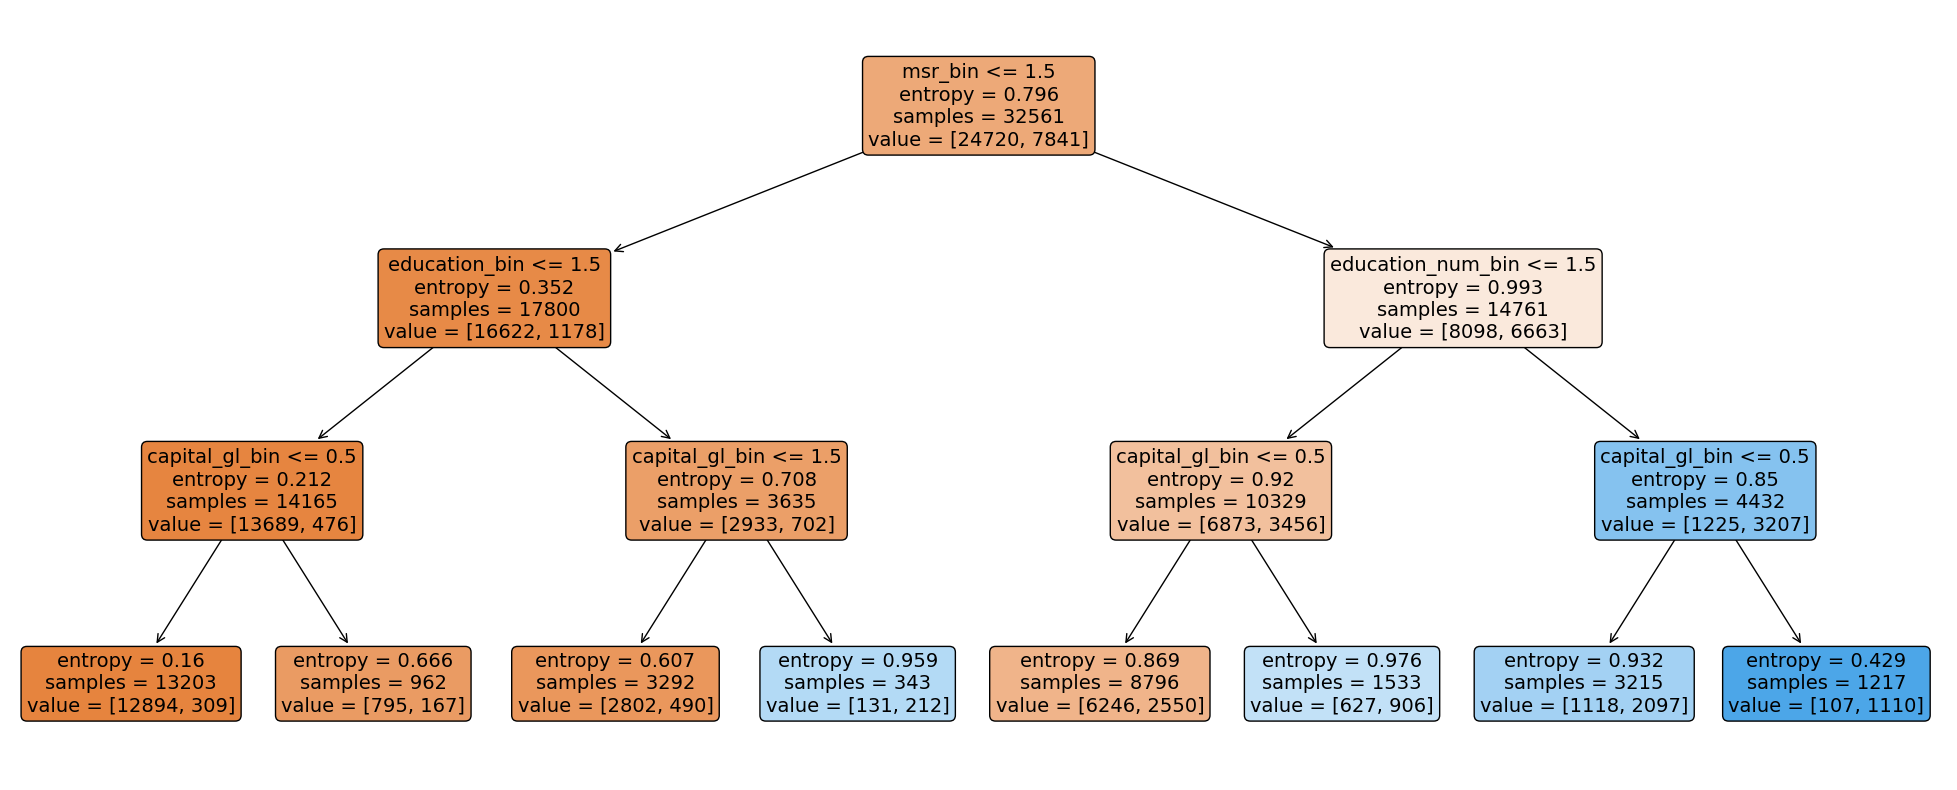

In [74]:
# Plot the decision tree
plt.figure(figsize=(25,10))
a = plot_tree(tree,
              feature_names=list(xtrain),
              filled=True,
              rounded=True,
              fontsize=14)

In [60]:
# 4 Evaluate Decision Tree

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
# creating a confusion table
# need to create a y prediction
ypred = tree.predict(xtest)

df_table = confusion_matrix(ytest, ypred)
print (df_table)

[[11456   979]
 [ 1743  2103]]


In [63]:
# confusion matrix takes into consideration actual versers predicted values
# [ true positive, false negative
# false positive, true negative]

In [64]:
# Accuracy, Precision, Recall, F1 Score 
# Using Titanic example 
print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

accuracy: 0.8328112523800749
precision: 0.68234912394549
recall: 0.546801872074883
f1 score:  0.6071016166281755


In [65]:
# 5 Tune Decision Tree Performance

In [66]:
# Needed to install a diffrenct version of ROC Curve
# plot_roc_curve was not working

from sklearn.metrics import RocCurveDisplay

0.7340362396160501


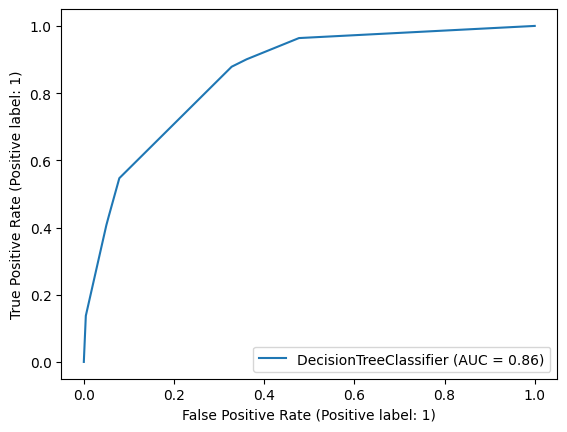

In [67]:
# Plot ROCCurve
RocCurveDisplay.from_estimator(tree, xtest, ytest)

print(test_auc)

In [68]:
# Find the AUC
from sklearn.metrics import roc_auc_score

In [69]:
test_auc = roc_auc_score(ytest, ypred)
print(test_auc)

0.7340362396160501


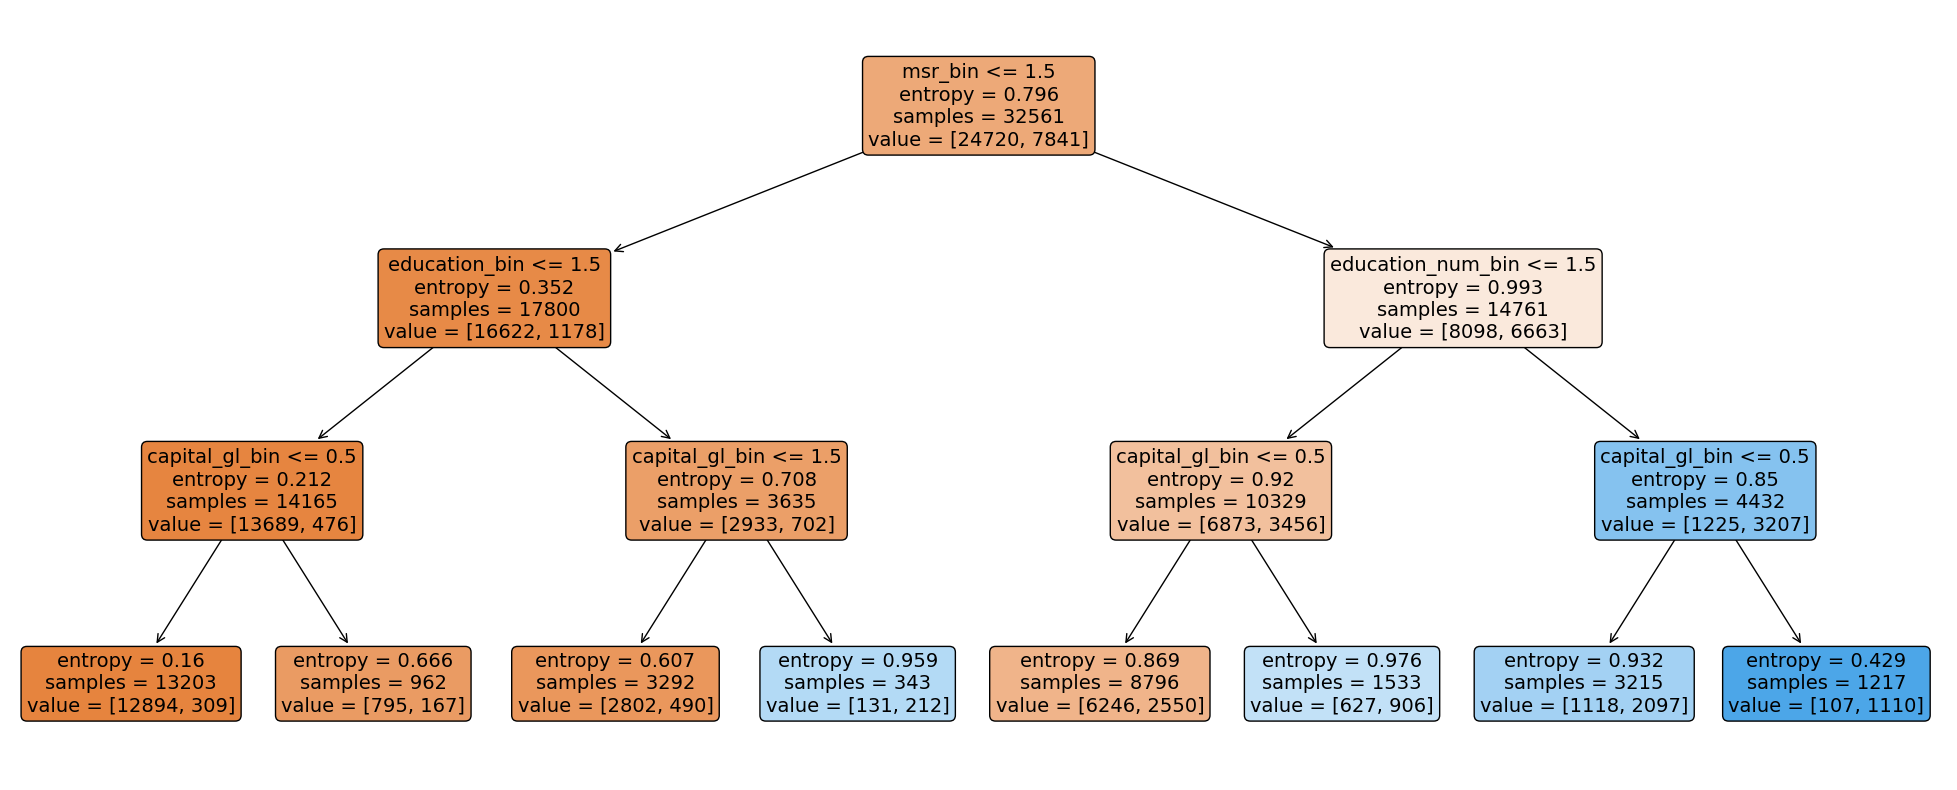

In [75]:
# Visualize Decision Tree 

# Plot the decision tree
plt.figure(figsize=(25,10))
a = plot_tree(tree,
              feature_names=list(xtrain),
              filled=True,
              rounded=True,
              fontsize=14)